In [324]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

import lightgbm as lgbm

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score



import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [388]:
train_df = pd.read_csv('train_modified_4.csv')
train_df.head()

,age,previous_year_rating,length_of_service,KPIs_metgreater80,awards_won,is_promoted,Total_training_score,Fraction_of_services_training,education_Below Secondary,education_Master's & above,...,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
0,35,5.0,8,1,0,0.0,49,0.125000,0,1,...,0,0,0,0,0,0,0,1,0,0
1,30,5.0,4,0,0,0.0,60,0.250000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34,3.0,7,0,0,0.0,50,0.142857,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,1.0,10,0,0,0.0,100,0.200000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45,3.0,2,0,0,0.0,73,0.500000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [389]:
train_df.shape

(54808, 52)

In [390]:
train_df = train_df.loc[(train_df['Total_training_score']<400)]

In [391]:
train_df.shape

(54761, 52)

In [392]:
train_df['Fraction_of_services_training'].describe(percentiles = [0.1, 0.2,.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,.95,.98,.99])


count    54761.000000
mean         0.370531
std          0.408458
min          0.029412
10%          0.100000
20%          0.125000
25%          0.142857
30%          0.157895
40%          0.200000
50%          0.250000
60%          0.333333
70%          0.333333
80%          0.500000
90%          1.000000
95%          1.000000
98%          2.000000
99%          2.000000
max          8.000000
Name: Fraction_of_services_training, dtype: float64

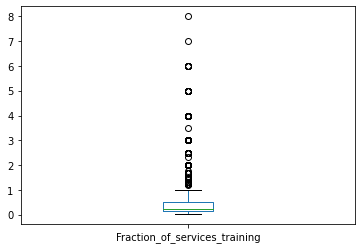

In [393]:
train_df['Fraction_of_services_training'].plot.box()

In [394]:
X = train_df.drop('is_promoted' , axis=1)
y= train_df['is_promoted']


In [395]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=.2)

In [396]:
train_data = lgbm.Dataset(X_train,y_train)
test_data = lgbm.Dataset(X_test,y_test)

In [377]:
#setting parameters for lightgbm
param = {'num_leaves':50, 'objective':'binary','max_depth':12,'learning_rate':.01,'max_bin':60,\
         "n_estimators":10000,\
         "reg_alpha" : 0.1,"reg_lambda":0.1,"n_jobs":-1,"colsample_bytree":.8,"min_child_weight":8,"subsample":0.8715623,\
        "min_data_in_leaf":100,"nthread":4,"metric" : "f1","verbosity" : -1,"seed": 120,'min_gain_to_split':.0222415,\
        'scale_pos_weight':2}


#param['metric'] = ['auc', 'binary_logloss']

In [378]:
gridParams = { 
    'learning_rate': [.002,.001,.1,.2,.3],
    'n_estimators': [2000,1000,800]
    }

In [379]:
lgb_estimator = lgbm.LGBMClassifier(boosting_type = 'gbdt', 
                                   n_estimators=400, 
                                   learning_rate =  0.1, 
                                   colsample_bytree = .8,
                                   subsample=.7,
                                   eval_metric  = 'f1',
                                   min_data_in_leaf = 100,
                                   reg_alpha=0.1,
                                   max_depth=15,
                                   num_leaves=16,
                                   verbose_eval=20, 
                                   nthread = 4,
                                   max_bin=50,
                                   seed = 120,
                                   scale_pos_weight=2,
                                   early_stopping_rounds=200)

In [380]:
g_lgbm = GridSearchCV(estimator=lgb_estimator, param_grid=gridParams, n_jobs = 3, cv= 4)

In [381]:
#lgb_model = g_lgbm.fit(X=X_train, y=y_train, eval_set = (X_test, y_test))

In [382]:
lgb_model.best_params_, lgb_model.best_score_

({'learning_rate': 0.002, 'n_estimators': 2000}, 0.9339050248662384)

In [383]:
min_data_in_leaf = 100,

In [397]:
lgb_estimator = lgbm.LGBMClassifier(boosting_type = 'gbdt', 
                                    objective='binary',
                                   n_estimators=1000, 
                                   learning_rate =  0.1, 
                                   colsample_bytree = .7,
                                   subsample=.8,
                                   eval_metric  = 'f1',
                                   min_data_in_leaf = 100,
                                   
                                    reg_lambda=0.1,
                                   max_depth=15,
                                   num_leaves=20,
                                   verbose_eval=20, 
                                   nthread = 4,
                                   seed = 120,
                                   scale_pos_weight=2,
                                
                                   early_stopping_rounds=200)

In [398]:
lm1 = lgb_estimator.fit(X=X_train, y=y_train, eval_set = (X_test, y_test))

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] early_stopping_round is set=200, early_stopping_rounds=200 will be ignored. Current value: early_stopping_round=200
[1]	valid_0's binary_logloss: 0.272343
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.261864
[3]	valid_0's binary_logloss: 0.250991
[4]	valid_0's binary_logloss: 0.251447
[5]	valid_0's binary_logloss: 0.246588
[6]	valid_0's binary_logloss: 0.244504
[7]	valid_0's binary_logloss: 0.244378
[8]	valid_0's binary_logloss: 0.241147
[9]	valid_0's binary_logloss: 0.239889
[10]	valid_0's binary_logloss: 0.236355
[11]	valid_0's binary_logloss: 0.235351
[12]	valid_0's binary_loglos

[228]	valid_0's binary_logloss: 0.182504
[229]	valid_0's binary_logloss: 0.182478
[230]	valid_0's binary_logloss: 0.182413
[231]	valid_0's binary_logloss: 0.182414
[232]	valid_0's binary_logloss: 0.182315
[233]	valid_0's binary_logloss: 0.182364
[234]	valid_0's binary_logloss: 0.182376
[235]	valid_0's binary_logloss: 0.182342
[236]	valid_0's binary_logloss: 0.182261
[237]	valid_0's binary_logloss: 0.182201
[238]	valid_0's binary_logloss: 0.182213
[239]	valid_0's binary_logloss: 0.182123
[240]	valid_0's binary_logloss: 0.182116
[241]	valid_0's binary_logloss: 0.182153
[242]	valid_0's binary_logloss: 0.182185
[243]	valid_0's binary_logloss: 0.182215
[244]	valid_0's binary_logloss: 0.182209
[245]	valid_0's binary_logloss: 0.182193
[246]	valid_0's binary_logloss: 0.182168
[247]	valid_0's binary_logloss: 0.182147
[248]	valid_0's binary_logloss: 0.182138
[249]	valid_0's binary_logloss: 0.18215
[250]	valid_0's binary_logloss: 0.182192
[251]	valid_0's binary_logloss: 0.182171
[252]	valid_0's b

[461]	valid_0's binary_logloss: 0.18163
[462]	valid_0's binary_logloss: 0.18162
[463]	valid_0's binary_logloss: 0.181609
[464]	valid_0's binary_logloss: 0.181594
[465]	valid_0's binary_logloss: 0.181598
[466]	valid_0's binary_logloss: 0.181616
[467]	valid_0's binary_logloss: 0.181642
[468]	valid_0's binary_logloss: 0.18164
[469]	valid_0's binary_logloss: 0.181613
[470]	valid_0's binary_logloss: 0.18164
[471]	valid_0's binary_logloss: 0.181661
[472]	valid_0's binary_logloss: 0.181618
[473]	valid_0's binary_logloss: 0.181628
[474]	valid_0's binary_logloss: 0.181597
[475]	valid_0's binary_logloss: 0.181607
[476]	valid_0's binary_logloss: 0.181607
[477]	valid_0's binary_logloss: 0.181614
[478]	valid_0's binary_logloss: 0.181553
[479]	valid_0's binary_logloss: 0.181562
[480]	valid_0's binary_logloss: 0.181548
[481]	valid_0's binary_logloss: 0.181565
[482]	valid_0's binary_logloss: 0.181551
[483]	valid_0's binary_logloss: 0.181534
[484]	valid_0's binary_logloss: 0.181545
[485]	valid_0's bina

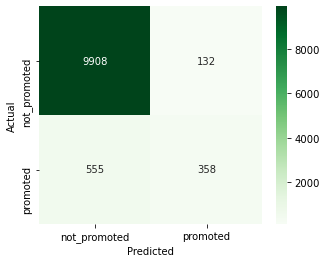

9908 555 358 132

 clasification report:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     10040
         1.0       0.73      0.39      0.51       913

    accuracy                           0.94     10953
   macro avg       0.84      0.69      0.74     10953
weighted avg       0.93      0.94      0.93     10953


 confussion matrix:
 [[9908  132]
 [ 555  358]]


In [399]:
# Predict the trading signal on test dataset
X_test_pred = lm1.predict(X_test)

# Predict the trading signal on test dataset
X_test_pred = lm1.predict(X_test)
array = confusion_matrix(y_test, X_test_pred)
df = pd.DataFrame(array, index=['not_promoted', 'promoted'], columns=[
'not_promoted', 'promoted'])
plt.figure(figsize=(5, 4))
sns.heatmap(df, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TN = array[0,0]
FN = array[1,0]
TP = array[1,1]
FP = array[0,1]
print(TN,FN,TP,FP)


print ('\n clasification report:\n', classification_report(y_test,X_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, X_test_pred))


In [400]:
mytestdata = pd.read_csv('test_modified_4.csv')
mytestdata.head()
# Predict the trading signal on test dataset
X_test_pred = lm1.predict(mytestdata)
test = pd.read_csv('test.csv')
test_emp_id = test[['employee_id']]
test_emp_id['is_promoted'] = X_test_pred
test_emp_id['is_promoted'] = test_emp_id['is_promoted'].astype(int)
test_emp_id['is_promoted'].value_counts()
test_emp_id.to_csv('Submission_10.csv',index=False)